### Reload Gray small Images from CSV
#### load train set
#### Extract sum pixels in x direction
#### Make a generalization for each class
#### Extract sum pixels in y direction
#### Make a generalization for each class
#### export vectors to CSV
**transform train**
**transform test**



Prepare label key

In [1]:
# Load packages
import pandas as pd
import numpy as np
import cv2 as cv
from skimage.feature import hog
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
def column_names_for_fd(fd_list, basename):
    '''returns a list of column names for each column for hog fd, 
    fd_list is a list of numpy arrays
    column 0 = label, column 1 = fd_value 1'''
    col_length = fd_list[0].shape[0] 
    column_name =[]
    #first column name in list
    column_name.append('label')
    for i in range(col_length):
        c_name = basename+str(i)
        column_name.append(c_name)
    return column_name

In [4]:
from PIL import Image
import os
import warnings
import time

def sum_to_csv(csv_path, column_names, fd_list, images_df):
    '''encodes a list of label + hog fd array into rows and columns in a CSV file.
    first column is label and the first fd value is on column 2, etc..'''
    warnings.simplefilter(action='ignore', category=FutureWarning)
    df = pd.DataFrame(columns=column_names)
    start_time = time.time()
    for i in range(len(fd_list)):
        #row format
        new_fd = np.reshape(fd_list[i], (1,len(fd_list[i])))
        #get vector label

       
        # Create a DataFrame with the label and image data
        fd_df = pd.DataFrame([np.insert(new_fd, 0, images_df.iloc[i,0])], columns=column_names)
        #fd_df = pd.DataFrame(new_fd, columns=column_names)

        df = df.append(fd_df, ignore_index=True)
        

        print('percent complete: %1.4f'%(i/(len(fd_list))), end =" - %s secs -\r" % \
              round((time.time() - start_time),2), flush=True)
    # Write DataFrame to CSV
    df.to_csv(csv_path, index=False, header=True)  

In [5]:
def plot_vector(row, images_df, width, height, channels):
    '''plots an image in vector form, with label at column 0
    and first pixel at column 1. row is selection of row. 
    images_df is dataframe csv file was loaded to.
    channels is 1 for grayscale, 3 for rgb'''
    img = images_df.iloc[row,1:].values
    img  = np.reshape(img, newshape=(height,width,channels))
    plt.figure(figsize = (28,28))
    f, axarr = plt.subplots(1,1, figsize=(10, 10))
    if(channels == 1):
        axarr.imshow(img, cmap='gray')
    else: 
        axarr.imshow(img) 
    

In [6]:
label_key = {
    "Pants": 0, 
    "Tshirts":1,
    "Watches":2, 
    "Casual Shoes":3 
 
}

In [7]:
decipher_key = {
    0:"Pants",
    1:"Tshirts",
    2:"Watches",
    3:"Casual Shoes"
 
}

**Load previously created CSV file with gray Images**

In [8]:
train_rgb_df = pd.read_csv('gray_small_train_set.csv')

In [9]:
train_rgb_df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel1190,pixel1191,pixel1192,pixel1193,pixel1194,pixel1195,pixel1196,pixel1197,pixel1198,pixel1199
0,0,255,255,255,255,254,241,236,234,220,...,253,253,254,254,255,255,255,255,255,255
1,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


**plot a row of loaded data for sanity check**

<Figure size 2016x2016 with 0 Axes>

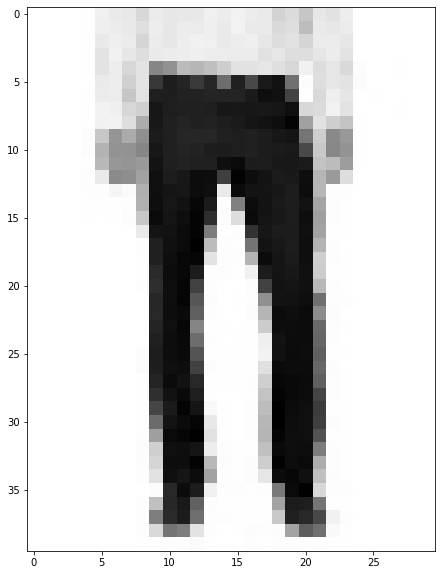

In [10]:
plot_vector(0, train_rgb_df, 30, 40, 1)

<Figure size 2016x2016 with 0 Axes>

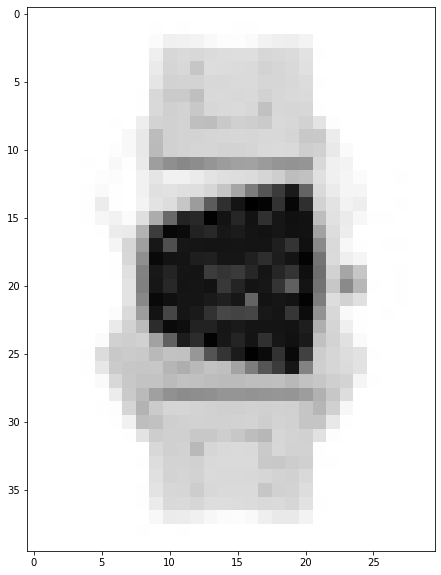

In [11]:
plot_vector(1, train_rgb_df, 30, 40, 1)

**Check sum across x along y for each category**

In [12]:
img = train_rgb_df.iloc[0, 1:].values.astype(np.uint8)
img = np.reshape(img, (40,30))

<Figure size 2016x2016 with 0 Axes>

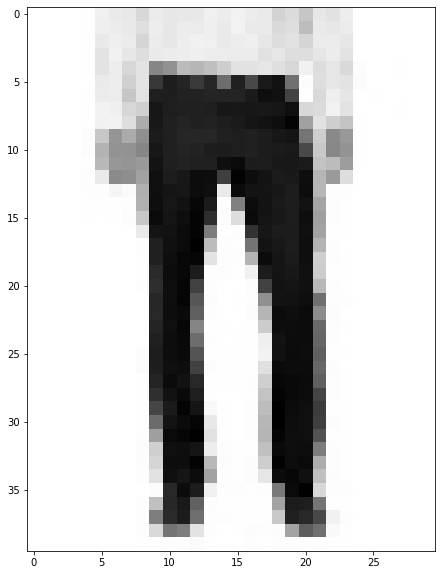

In [13]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(img, cmap='gray')

In [14]:
# Load the grayscale image
#img = cv.imread(img, cv.IMREAD_GRAYSCALE)

# Sum the pixel values along the x-axis
sum_pixels = np.sum(img, axis=1)

print(sum_pixels)
print(sum)

[7213 7230 7248 7250 6870 5494 5292 5198 5061 4772 4661 4660 4665 5160
 5281 5376 5565 5707 5810 5927 5989 6001 6059 6082 6090 6059 6028 5988
 5954 5950 5951 5996 6125 6106 6166 6417 6440 6392 6978 7626]
<built-in function sum>


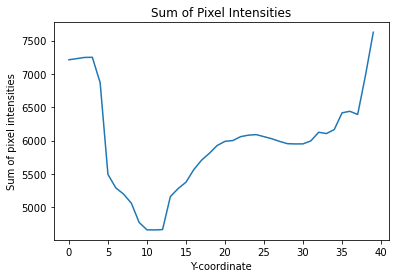

In [15]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a line plot
sns.lineplot(x=np.arange(len(sum_pixels)), y=sum_pixels, ax=ax)

# Set the title and labels
ax.set_title('Sum of Pixel Intensities')
ax.set_xlabel('Y-coordinate')
ax.set_ylabel('Sum of pixel intensities')

# Display the plot
plt.show()

**Do for all pants**

In [16]:
label = label_key['Pants']
r =  train_rgb_df[train_rgb_df['label']==label].shape[0]
r

767

In [17]:
total_pvectors = []
img_df = train_rgb_df[train_rgb_df['label']==label]
final_pvector = np.zeros(40,)
for i in range(r):
    img = img_df.iloc[i, 1:].values.astype(np.uint8)
    img = np.reshape(img, (40,30))
    sum_pixels = np.sum(img, axis=1)
    total_pvectors.append(sum_pixels )
    final_pvector = (final_pvector + sum_pixels)/2 #average
    

In [18]:
len(total_pvectors)

767

In [19]:
type(total_pvectors[0])

numpy.ndarray

In [20]:
final_pvector

array([6899.15211366, 6890.71814904, 6855.21004041, 6728.08334296,
       6588.36606438, 5991.88372827, 5786.18598612, 5838.44231117,
       5831.24392305, 5837.16075747, 5846.45488275, 5874.49260494,
       6022.1750857 , 6130.58198554, 6206.70501873, 6261.36539714,
       6315.31687634, 6384.84922366, 6445.3723307 , 6497.36604327,
       6483.72611638, 6467.70234768, 6472.03430928, 6489.83780968,
       6560.86045952, 6588.25164057, 6598.66323531, 6599.59924143,
       6598.59022526, 6623.76277297, 6632.60188101, 6703.95823435,
       6692.9144382 , 6672.87717742, 6734.76384146, 6905.93378782,
       6898.29322262, 6728.04472807, 7002.83074944, 7541.72839118])

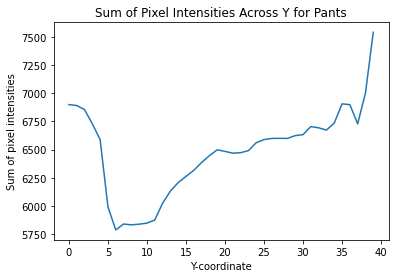

In [21]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a line plot
sns.lineplot(x=np.arange(len(final_pvector)), y=final_pvector, ax=ax)

# Set the title and labels
ax.set_title('Sum of Pixel Intensities Across Y for Pants')
ax.set_xlabel('Y-coordinate')
ax.set_ylabel('Sum of pixel intensities')

# Display the plot
plt.show()

**The above plot shows that for Pants, the top row is usually white.**

In [22]:
total_pvectorsx = []

final_pvectorx = np.zeros(30,)
for i in range(r):
    img = img_df.iloc[i, 1:].values.astype(np.uint8)
    img = np.reshape(img, (40,30))
    sum_pixels = np.sum(img, axis=0)
    total_pvectorsx.append(sum_pixels )
    final_pvectorx = (final_pvectorx + sum_pixels)
final_pvectorx = final_pvectorx/r

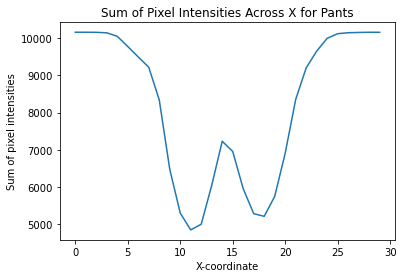

In [23]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a line plot
sns.lineplot(x=np.arange(len(final_pvectorx)), y=final_pvectorx, ax=ax)

# Set the title and labels
ax.set_title('Sum of Pixel Intensities Across X for Pants')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Sum of pixel intensities')

# Display the plot
plt.show()

**try black and white**

In [24]:
img = train_rgb_df.iloc[0, 1:].values.astype(np.uint8)
img = np.reshape(img, (40,30))
ret, img_bw = cv.threshold(img, 250, 255, cv.THRESH_BINARY)

<Figure size 2016x2016 with 0 Axes>

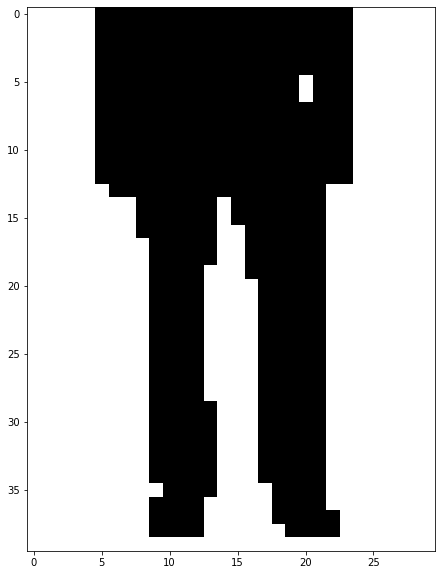

In [25]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(img_bw, cmap='gray')

In [26]:
total_pvectors = []
img_df = train_rgb_df[train_rgb_df['label']==label]
final_pvector = np.zeros(40,)
for i in range(r):
    img = img_df.iloc[i, 1:].values.astype(np.uint8)
    img = np.reshape(img, (40,30))
    ret, img_bw = cv.threshold(img, 127, 250, cv.THRESH_BINARY)
    sum_pixels = np.sum(img_bw, axis=1)
    total_pvectors.append(sum_pixels )
    final_pvector = (final_pvector + sum_pixels) #average
final_pvector = final_pvector/r

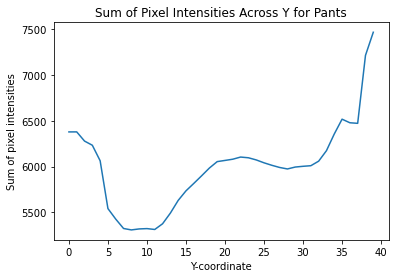

In [27]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a line plot
sns.lineplot(x=np.arange(len(final_pvector)), y=final_pvector, ax=ax)

# Set the title and labels
ax.set_title('Sum of Pixel Intensities Across Y for Pants')
ax.set_xlabel('Y-coordinate')
ax.set_ylabel('Sum of pixel intensities')

# Display the plot
plt.show()

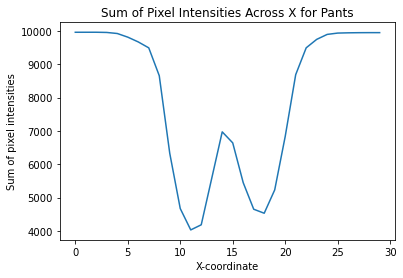

In [28]:
total_pvectors = []
img_df = train_rgb_df[train_rgb_df['label']==label]
final_pvector = np.zeros(30,)
for i in range(r):
    img = img_df.iloc[i, 1:].values.astype(np.uint8)
    img = np.reshape(img, (40,30))
    ret, img_bw = cv.threshold(img, 127, 250, cv.THRESH_BINARY)
    sum_pixels = np.sum(img_bw, axis=0)
    total_pvectors.append(sum_pixels )
    final_pvector = (final_pvector + sum_pixels) #average
final_pvector = final_pvector/r

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a line plot
sns.lineplot(x=np.arange(len(final_pvector)), y=final_pvector, ax=ax)

# Set the title and labels
ax.set_title('Sum of Pixel Intensities Across X for Pants')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Sum of pixel intensities')

# Display the plot
plt.show()

**Do this for Tshirts**

In [29]:
label = label_key['Tshirts']
r =  train_rgb_df[train_rgb_df['label']==label].shape[0]

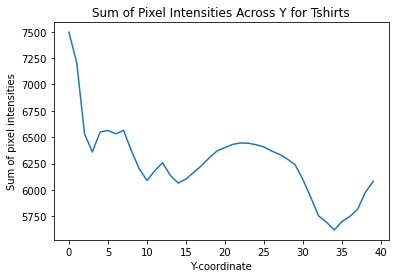

In [30]:
total_pvectors = []
img_df = train_rgb_df[train_rgb_df['label']==label]
final_pvector = np.zeros(40,)
for i in range(r):
    img = img_df.iloc[i, 1:].values.astype(np.uint8)
    img = np.reshape(img, (40,30))
    ret, img_bw = cv.threshold(img, 127, 250, cv.THRESH_BINARY)
    sum_pixels = np.sum(img_bw, axis=1)
    total_pvectors.append(sum_pixels )
    final_pvector = (final_pvector + sum_pixels) #average
final_pvector = final_pvector/r

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a line plot
sns.lineplot(x=np.arange(len(final_pvector)), y=final_pvector, ax=ax)

# Set the title and labels
ax.set_title('Sum of Pixel Intensities Across Y for Tshirts')
ax.set_xlabel('Y-coordinate')
ax.set_ylabel('Sum of pixel intensities')

# Display the plot
plt.show()

**The above reflects that at Y = 0 the first row is usually clear for Tshirts, and the bottom row is not. The above cleary shows that it can be used to discriminate between Pants and Tshirts**

**Watches**

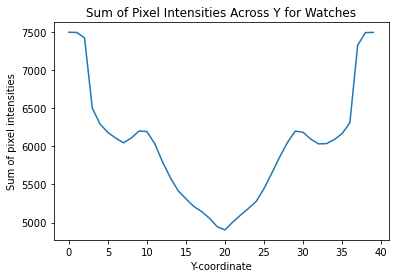

In [31]:
label = label_key['Watches']
r =  train_rgb_df[train_rgb_df['label']==label].shape[0]
total_pvectors = []
img_df = train_rgb_df[train_rgb_df['label']==label]
final_pvector = np.zeros(40,)
for i in range(r):
    img = img_df.iloc[i, 1:].values.astype(np.uint8)
    img = np.reshape(img, (40,30))
    ret, img_bw = cv.threshold(img, 127, 250, cv.THRESH_BINARY)
    sum_pixels = np.sum(img_bw, axis=1)
    total_pvectors.append(sum_pixels )
    final_pvector = (final_pvector + sum_pixels) #average
final_pvector = final_pvector/r

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a line plot
sns.lineplot(x=np.arange(len(final_pvector)), y=final_pvector, ax=ax)

# Set the title and labels
ax.set_title('Sum of Pixel Intensities Across Y for Watches')
ax.set_xlabel('Y-coordinate')
ax.set_ylabel('Sum of pixel intensities')

# Display the plot
plt.show()

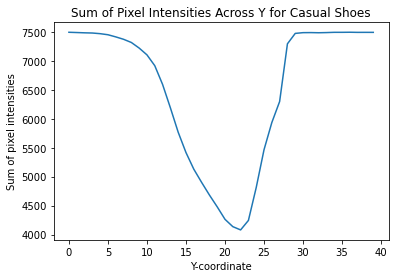

In [32]:
label = label_key['Casual Shoes']
r =  train_rgb_df[train_rgb_df['label']==label].shape[0]
total_pvectors = []
img_df = train_rgb_df[train_rgb_df['label']==label]
final_pvector = np.zeros(40,)
for i in range(r):
    img = img_df.iloc[i, 1:].values.astype(np.uint8)
    img = np.reshape(img, (40,30))
    ret, img_bw = cv.threshold(img, 127, 250, cv.THRESH_BINARY)
    sum_pixels = np.sum(img_bw, axis=1)
    total_pvectors.append(sum_pixels )
    final_pvector = (final_pvector + sum_pixels) #average
final_pvector = final_pvector/r

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a line plot
sns.lineplot(x=np.arange(len(final_pvector)), y=final_pvector, ax=ax)

# Set the title and labels
ax.set_title('Sum of Pixel Intensities Across Y for Casual Shoes')
ax.set_xlabel('Y-coordinate')
ax.set_ylabel('Sum of pixel intensities')

# Display the plot
plt.show()

**The above shows that shoes have a high margin of free space at top and bottom row**

### generate sum Y vector for all images and save to CSV

**load all images**

In [ ]:
train_gray_df = pd.read_csv('gray_small_train_set.csv')

In [ ]:
test_gray_df = pd.read_csv('gray_small_test_set.csv')

In [ ]:
val_gray_df = pd.read_csv('gray_small_val_set.csv')

**generate vectors**

**export to CSV**

In [ ]:
r =  train_gray_df.shape[0]
total_vectors = []
img_df = train_gray_df
#final_pvector = np.zeros(40,)
for i in range(r):
    img = img_df.iloc[i, 1:].values.astype(np.uint8)
    img = np.reshape(img, (40,30))
    ret, img_bw = cv.threshold(img, 127, 250, cv.THRESH_BINARY)
    sum_pixels = np.sum(img_bw, axis=1)
    total_vectors.append(sum_pixels)
    #final_pvector = (final_pvector + sum_pixels) #average
#final_pvector = final_pvector/r
column_names = column_names_for_fd(total_vectors, 'sum_y_')
sum_to_csv('histy_train.csv', column_names,total_vectors, img_df )

In [ ]:
check = pd.read_csv('histy_train.csv')

In [ ]:
check.shape

In [ ]:
r =  test_gray_df.shape[0]
total_vectors = []
img_df = test_gray_df
#final_pvector = np.zeros(40,)
for i in range(r):
    img = img_df.iloc[i, 1:].values.astype(np.uint8)
    img = np.reshape(img, (40,30))
    ret, img_bw = cv.threshold(img, 127, 250, cv.THRESH_BINARY)
    sum_pixels = np.sum(img_bw, axis=1)
    total_vectors.append(sum_pixels)
    #final_pvector = (final_pvector + sum_pixels) #average
#final_pvector = final_pvector/r
column_names = column_names_for_fd(total_vectors, 'sum_y_')
sum_to_csv('histy_test.csv', column_names,total_vectors, img_df )

In [ ]:
check = pd.read_csv('histy_test.csv')
check.head(5)

In [ ]:
r =  val_gray_df.shape[0]
total_vectors = []
img_df = val_gray_df
#final_pvector = np.zeros(40,)
for i in range(r):
    img = img_df.iloc[i, 1:].values.astype(np.uint8)
    img = np.reshape(img, (40,30))
    ret, img_bw = cv.threshold(img, 127, 250, cv.THRESH_BINARY)
    sum_pixels = np.sum(img_bw, axis=1)
    total_vectors.append(sum_pixels)
    #final_pvector = (final_pvector + sum_pixels) #average
#final_pvector = final_pvector/r
column_names = column_names_for_fd(total_vectors, 'sum_y_')
sum_to_csv('histy_val.csv', column_names, total_vectors, img_df )

In [ ]:
check = pd.read_csv('histy_val.csv')
check.head(5)

**do the same for x axis**

In [ ]:
r =  train_gray_df.shape[0]
total_vectors = []
img_df = train_gray_df
#final_pvector = np.zeros(40,)
for i in range(r):
    img = img_df.iloc[i, 1:].values.astype(np.uint8)
    img = np.reshape(img, (40,30))
    ret, img_bw = cv.threshold(img, 127, 250, cv.THRESH_BINARY)
    sum_pixels = np.sum(img_bw, axis=0)
    total_vectors.append(sum_pixels)
    #final_pvector = (final_pvector + sum_pixels) #average
#final_pvector = final_pvector/r
column_names = column_names_for_fd(total_vectors, 'sum_x_')
sum_to_csv('histx_train.csv', column_names,total_vectors, img_df )

In [ ]:
r =  test_gray_df.shape[0]
total_vectors = []
img_df = test_gray_df
#final_pvector = np.zeros(40,)
for i in range(r):
    img = img_df.iloc[i, 1:].values.astype(np.uint8)
    img = np.reshape(img, (40,30))
    ret, img_bw = cv.threshold(img, 127, 250, cv.THRESH_BINARY)
    sum_pixels = np.sum(img_bw, axis=0)
    total_vectors.append(sum_pixels)
    #final_pvector = (final_pvector + sum_pixels) #average
#final_pvector = final_pvector/r
column_names = column_names_for_fd(total_vectors, 'sum_x_')
sum_to_csv('histx_test.csv', column_names,total_vectors, img_df )

In [ ]:
r =  val_gray_df.shape[0]
total_vectors = []
img_df = val_gray_df
#final_pvector = np.zeros(40,)
for i in range(r):
    img = img_df.iloc[i, 1:].values.astype(np.uint8)
    img = np.reshape(img, (40,30))
    ret, img_bw = cv.threshold(img, 127, 250, cv.THRESH_BINARY)
    sum_pixels = np.sum(img_bw, axis=0)
    total_vectors.append(sum_pixels)
    #final_pvector = (final_pvector + sum_pixels) #average
#final_pvector = final_pvector/r
column_names = column_names_for_fd(total_vectors, 'sum_x_')
sum_to_csv('histx_val.csv', column_names,total_vectors, img_df )

**at this point, a list train_pvectors has vector value (40 for y axis)